The PATH variable has to be changed so it points to your own BinaryClassTestingFolder of Images.

This file is used to test, how enabling or disabling some parameters of the randomization process of the Image Generation changes the outcome of the ability to predict new data.

For every parameter there is a folder with all parameters enabled but the one parameter disabled and another folder with only this parameter enabled.

Most of these get run multiple times (NUMBER_OF ITERATIONS times to be exact). This is because a CNN doesn't produce the same endresult if it is run multiple times. To account for this, an average is generated, to get a better value. It will take much longer, but it is more accurate.

At the end of the file there is a summary of the results. 

It does take 45 minutes on my GPU tho!

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [52]:
NUMBER_OF_ITERATIONS = 5

#change this value to your path of the BinaryClassTestingFolder
PATH = 'C:/Users/User/OneDrive/Desktop/DeepLearningStuff/Images/BinaryClassTestingFolder/'

In [4]:
def createNewClassifier(PATH, epochCount, THRESHOLD):
    train_directory = os.path.join(PATH, 'train')
    validation_directory = os.path.join(PATH, 'validation')
    test_directory = os.path.join(PATH, 'test')

    BATCH_SIZE = 32
    IMG_SIZE = (256, 256)
    
    train_dataset = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                                shuffle=True,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE)

    validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_directory,
                                                                     shuffle=True,
                                                                     batch_size=BATCH_SIZE,
                                                                     image_size=IMG_SIZE)

    test_dataset = tf.keras.utils.image_dataset_from_directory(test_directory,
                                                                shuffle=True,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE)
    
    train_dataset = train_dataset.map(lambda x,y: (x/255, y))
    validation_dataset = validation_dataset.map(lambda x,y: (x/255, y))
    test_dataset = test_dataset.map(lambda x,y: (x/255, y))
    
    data_iterator = train_dataset.as_numpy_iterator()
    
    batch = data_iterator.next()
    
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(16, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    
    model.summary()
    
    logdir='logs'
    
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    
    hist = model.fit(train_dataset, epochs=epochCount, validation_data=validation_dataset, callbacks=[tensorboard_callback])
    
    fig = plt.figure()
    plt.plot(hist.history['loss'], color='teal', label='loss')
    plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
    fig.suptitle('Loss', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()
    
    fig = plt.figure()
    plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
    plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
    fig.suptitle('Accuracy', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()
    
    imageCount = 0
    correctCount = 0
    falseCount = 0

    for batch in test_dataset.as_numpy_iterator():
        for idx, img in enumerate(batch[0]):
            yhat = model.predict(np.expand_dims(img, 0))

            if(yhat > THRESHOLD and batch[1][idx] == 0):
                # predicted as handMissing but is handExists
                falseCount += 1
            elif(yhat > THRESHOLD and batch[1][idx] == 1):
                # predicted as handMissing and is handMissing
                correctCount += 1
            elif(yhat < THRESHOLD and batch[1][idx] == 0):
                # predicted as handExists and is handExists
                correctCount += 1
            elif(yhat < THRESHOLD and batch[1][idx] == 1):
                # predicted as handExists but is handMissing
                falseCount += 1

            imageCount += 1

    print("Amount categorized: " + str(imageCount))
    print("Correctly categorized: " + str(correctCount))
    print("Falsely categorized: " + str(falseCount))
    print("Ratio: " + str(correctCount / imageCount))

    normalDetectionRatio = correctCount / imageCount
    
    return (correctCount / imageCount)

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
  

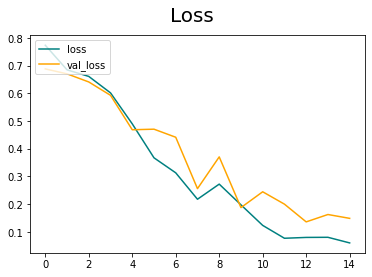

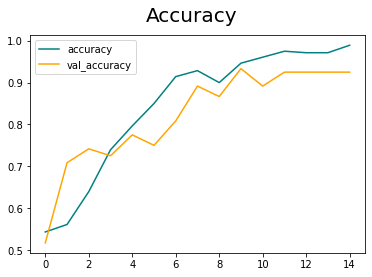

Amount categorized: 100
Correctly categorized: 84
Falsely categorized: 16
Ratio: 0.84


In [5]:
ratioImagesThreshold01 = createNewClassifier(PATH + 'ImagesAllEnabled', 15, 0.1)

In [6]:
ratioImagesThreshold01

0.84

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      


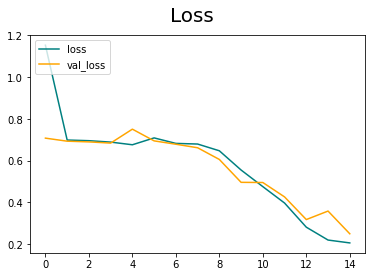

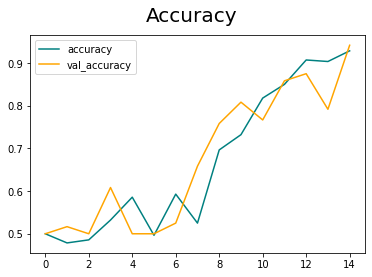

Amount categorized: 100
Correctly categorized: 86
Falsely categorized: 14
Ratio: 0.86


In [7]:
ratioImagesThreshold03 = createNewClassifier(PATH + 'ImagesAllEnabled', 15, 0.3)

In [8]:
ratioImagesThreshold03

0.86

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      


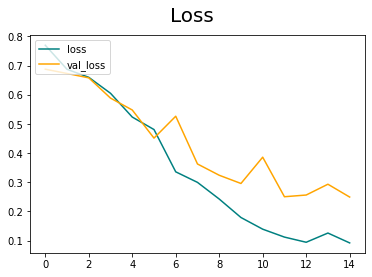

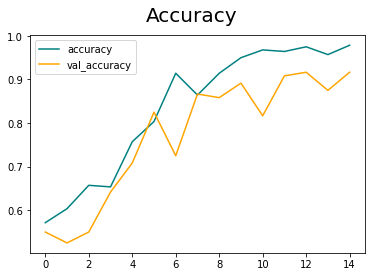

Amount categorized: 100
Correctly categorized: 92
Falsely categorized: 8
Ratio: 0.92


In [9]:
ratioImagesThreshold05 = createNewClassifier(PATH + 'ImagesAllEnabled', 15, 0.5)

In [10]:
ratioImagesThreshold05

0.92

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      


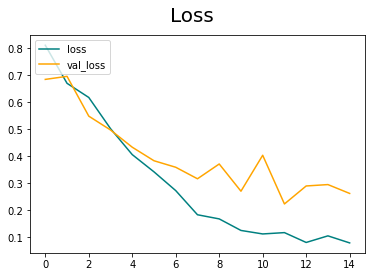

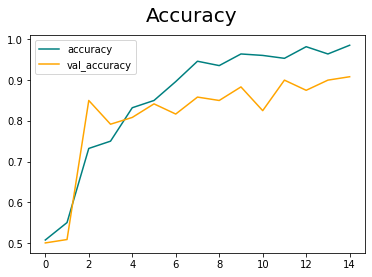

Amount categorized: 100
Correctly categorized: 86
Falsely categorized: 14
Ratio: 0.86


In [11]:
ratioImagesThreshold07 = createNewClassifier(PATH + 'ImagesAllEnabled', 15, 0.7)

In [12]:
ratioImagesThreshold07

0.86

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      


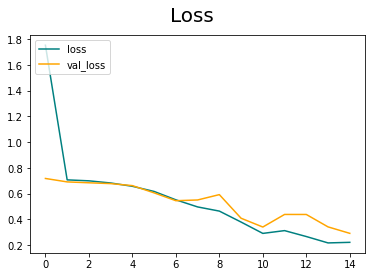

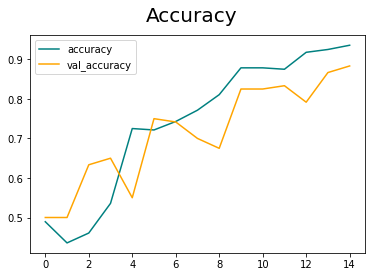

Amount categorized: 100
Correctly categorized: 65
Falsely categorized: 35
Ratio: 0.65


In [13]:
ratioImagesThreshold09 = createNewClassifier(PATH + 'ImagesAllEnabled', 15, 0.9)

In [14]:
ratioImagesThreshold09

0.65

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_246 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_246 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_247 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_247 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_248 (Conv2D)         (None, 60, 60, 16)        4624      

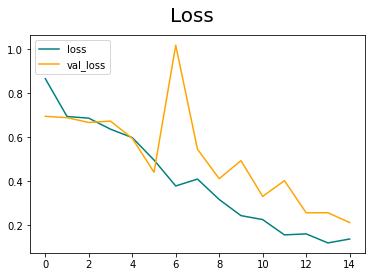

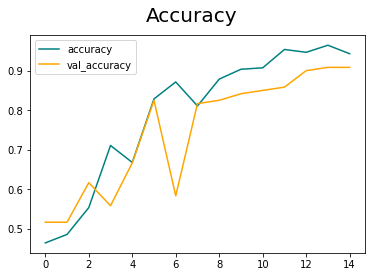

Amount categorized: 100
Correctly categorized: 87
Falsely categorized: 13
Ratio: 0.87
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_249 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_249 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_250 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_250 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

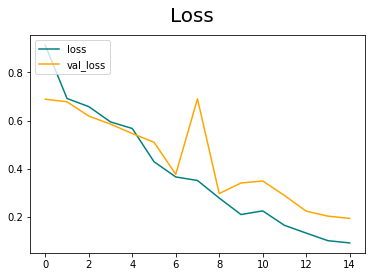

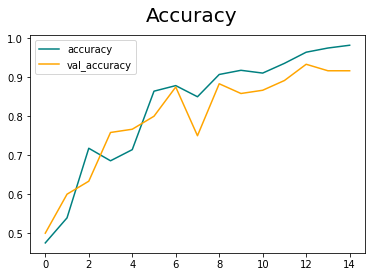

Amount categorized: 100
Correctly categorized: 90
Falsely categorized: 10
Ratio: 0.9
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_252 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_252 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_253 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_253 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

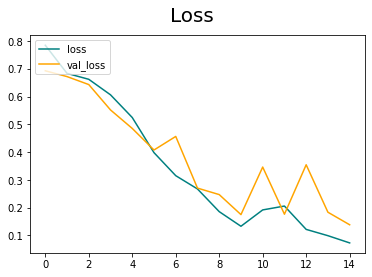

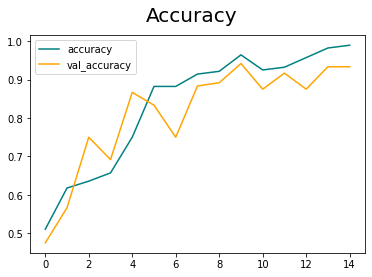

Amount categorized: 100
Correctly categorized: 90
Falsely categorized: 10
Ratio: 0.9
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_255 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_255 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_256 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_256 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

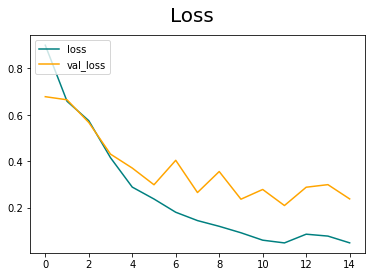

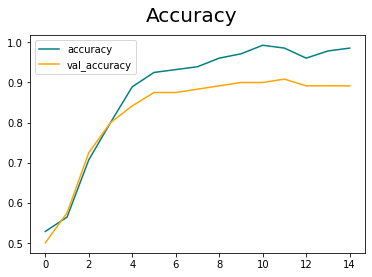

Amount categorized: 100
Correctly categorized: 78
Falsely categorized: 22
Ratio: 0.78
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_258 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_258 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_259 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_259 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

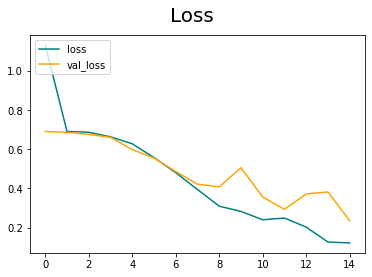

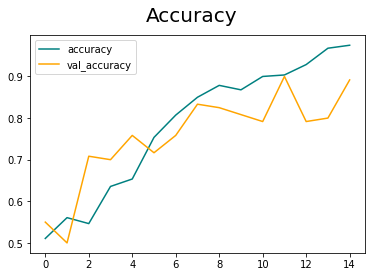

Amount categorized: 100
Correctly categorized: 80
Falsely categorized: 20
Ratio: 0.8


In [54]:
ratioImagesAllEnabled = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesAllEnabled += createNewClassifier(PATH + 'ImagesAllEnabled', 15, 0.5) / NUMBER_OF_ITERATIONS

In [55]:
ratioImagesAllEnabled

0.8500000000000001

Found 2800 files belonging to 2 classes.
Found 1199 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_261 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_261 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_262 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_262 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_263 (Conv2D)         (None, 60, 60, 16)        4624    

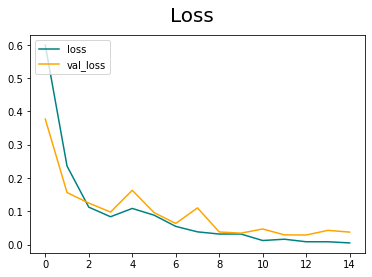

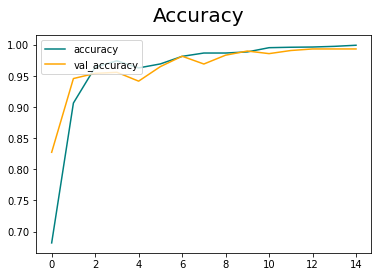

Amount categorized: 100
Correctly categorized: 90
Falsely categorized: 10
Ratio: 0.9
Found 2800 files belonging to 2 classes.
Found 1199 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_264 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_264 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_265 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_265 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                            

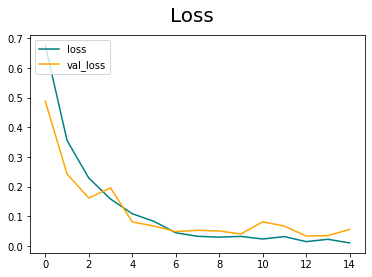

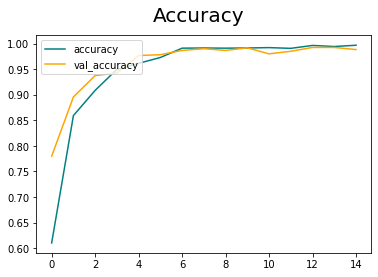

Amount categorized: 100
Correctly categorized: 96
Falsely categorized: 4
Ratio: 0.96
Found 2800 files belonging to 2 classes.
Found 1199 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_267 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_267 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_268 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_268 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                            

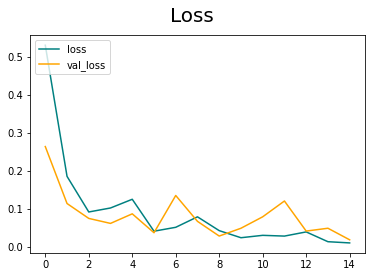

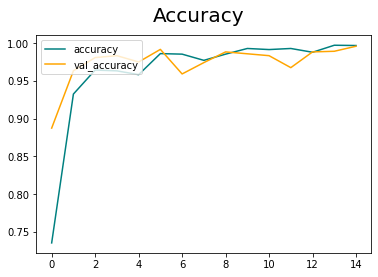

Amount categorized: 100
Correctly categorized: 92
Falsely categorized: 8
Ratio: 0.92
Found 2800 files belonging to 2 classes.
Found 1199 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_270 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_270 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_271 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_271 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                            

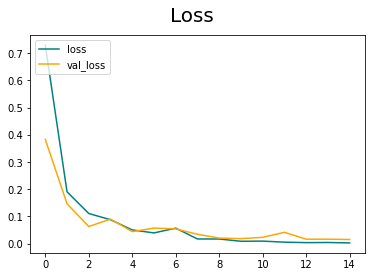

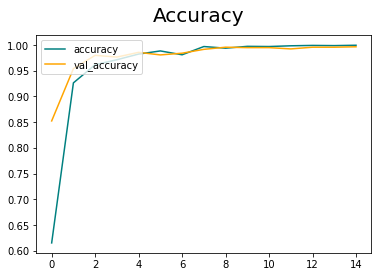

Amount categorized: 100
Correctly categorized: 89
Falsely categorized: 11
Ratio: 0.89
Found 2800 files belonging to 2 classes.
Found 1199 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_273 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_273 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_274 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_274 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                           

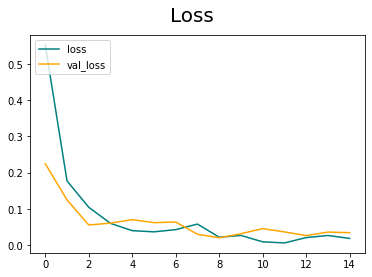

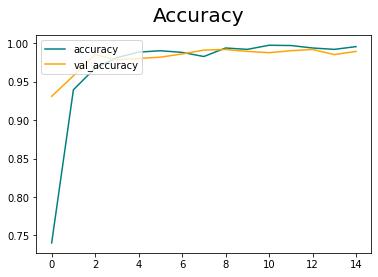

Amount categorized: 100
Correctly categorized: 92
Falsely categorized: 8
Ratio: 0.92


In [56]:
ratioImagesAllEnabledBigSize = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesAllEnabledBigSize += createNewClassifier(PATH + 'ImagesAllEnabledBigSize', 15, 0.5) / NUMBER_OF_ITERATIONS

In [57]:
ratioImagesAllEnabledBigSize

0.9179999999999999

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 60, 60, 16)        4624      

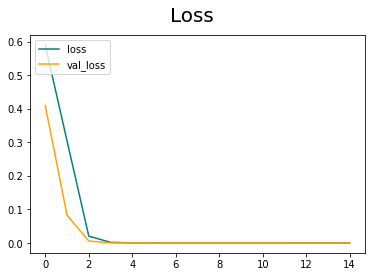

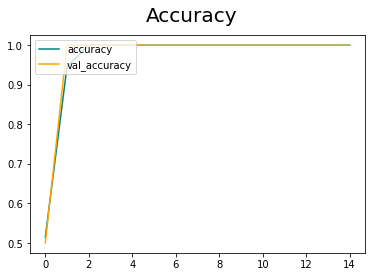

Amount categorized: 100
Correctly categorized: 41
Falsely categorized: 59
Ratio: 0.41
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

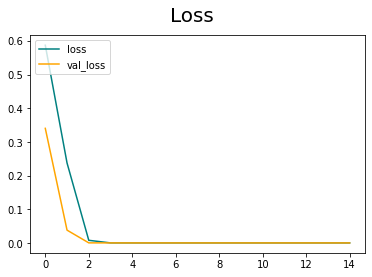

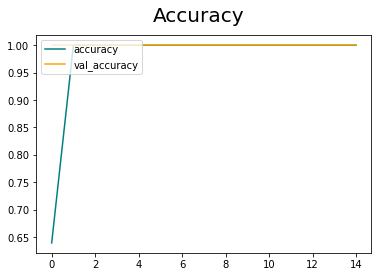

Amount categorized: 100
Correctly categorized: 37
Falsely categorized: 63
Ratio: 0.37
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

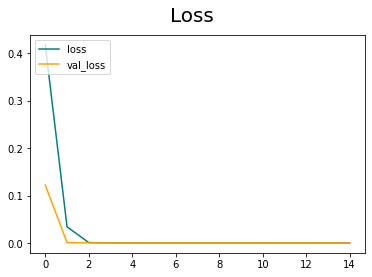

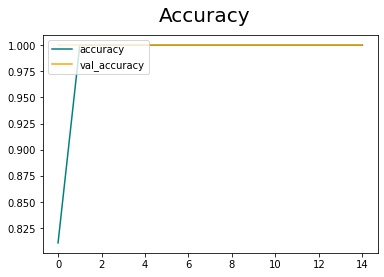

Amount categorized: 100
Correctly categorized: 40
Falsely categorized: 60
Ratio: 0.4
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                              

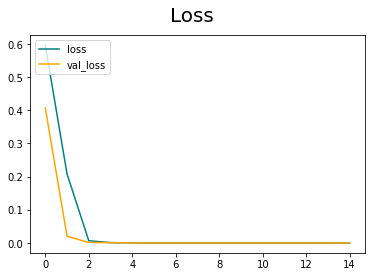

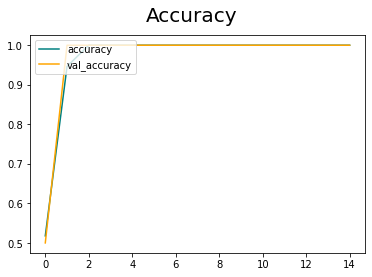

Amount categorized: 100
Correctly categorized: 37
Falsely categorized: 63
Ratio: 0.37
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

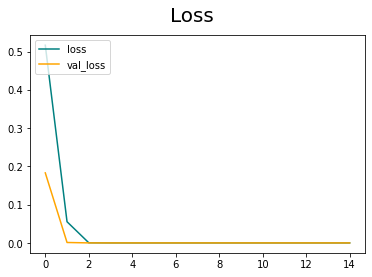

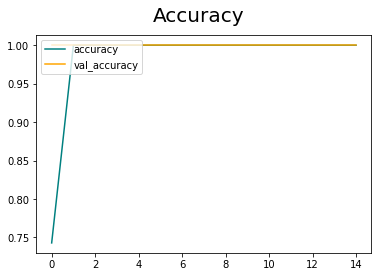

Amount categorized: 100
Correctly categorized: 33
Falsely categorized: 67
Ratio: 0.33


In [19]:
ratioImagesAllButBackgroundChanges = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesAllButBackgroundChanges += createNewClassifier(PATH + 'ImagesAllButBackgroundChanges', 15, 0.5) / NUMBER_OF_ITERATIONS

In [20]:
ratioImagesAllButBackgroundChanges

0.376

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 60, 60, 16)        4624      

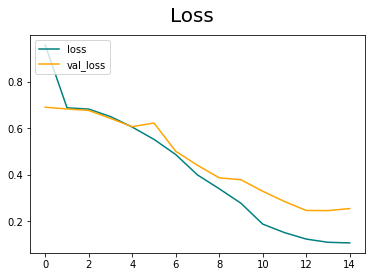

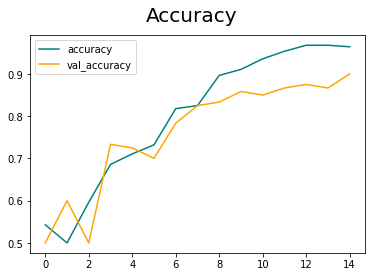

Amount categorized: 100
Correctly categorized: 72
Falsely categorized: 28
Ratio: 0.72
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

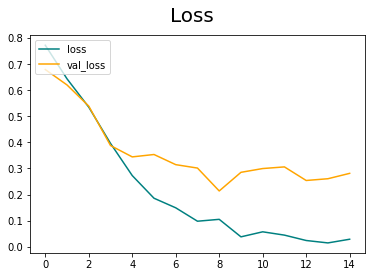

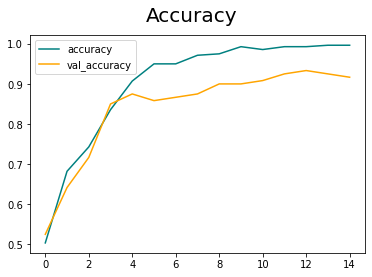

Amount categorized: 100
Correctly categorized: 69
Falsely categorized: 31
Ratio: 0.69
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

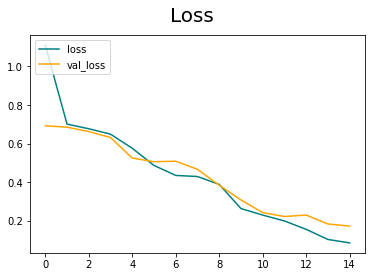

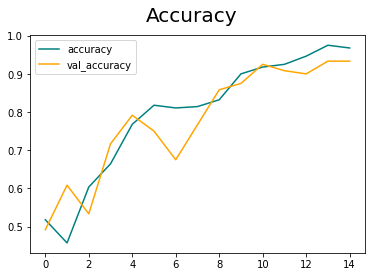

Amount categorized: 100
Correctly categorized: 98
Falsely categorized: 2
Ratio: 0.98
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                              

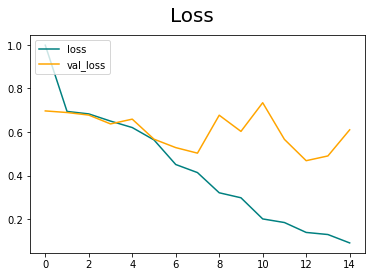

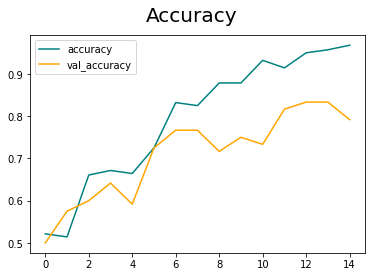

Amount categorized: 100
Correctly categorized: 44
Falsely categorized: 56
Ratio: 0.44
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

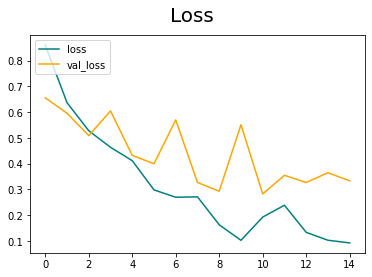

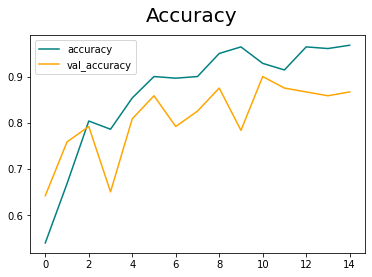

Amount categorized: 100
Correctly categorized: 67
Falsely categorized: 33
Ratio: 0.67


In [21]:
ratioImagesAllButRandomAmbientSkyColor = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesAllButRandomAmbientSkyColor += createNewClassifier(PATH + 'ImagesAllButRandomAmbientSkyColor', 15, 0.5) / NUMBER_OF_ITERATIONS

In [22]:
ratioImagesAllButRandomAmbientSkyColor

0.7

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 60, 60, 16)        4624      

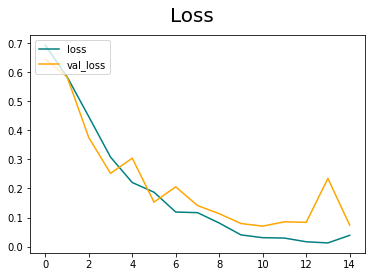

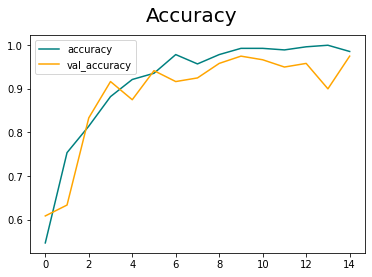

Amount categorized: 100
Correctly categorized: 86
Falsely categorized: 14
Ratio: 0.86
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

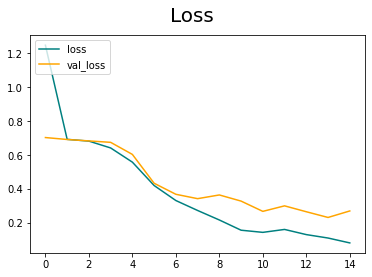

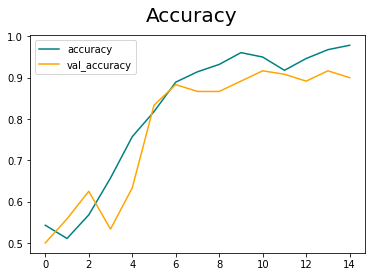

Amount categorized: 100
Correctly categorized: 77
Falsely categorized: 23
Ratio: 0.77
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

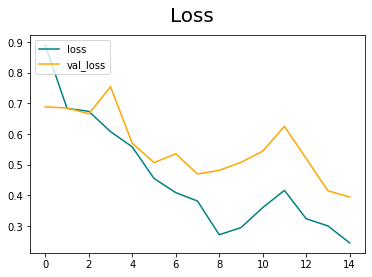

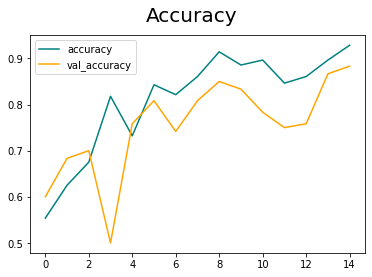

Amount categorized: 100
Correctly categorized: 65
Falsely categorized: 35
Ratio: 0.65
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

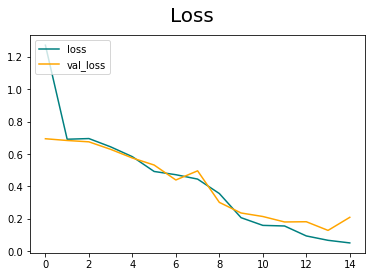

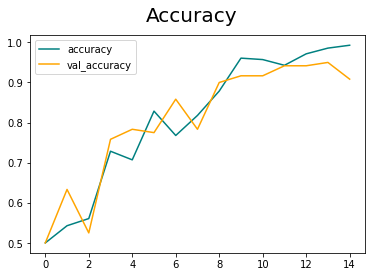

Amount categorized: 100
Correctly categorized: 78
Falsely categorized: 22
Ratio: 0.78
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

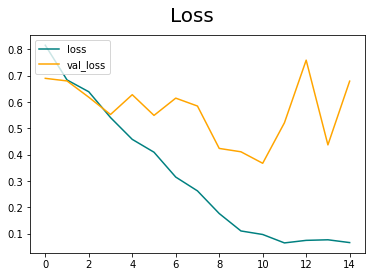

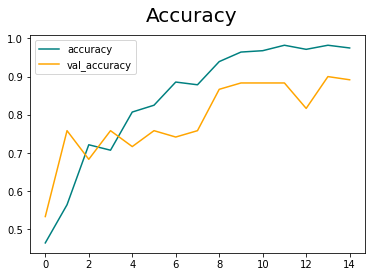

Amount categorized: 100
Correctly categorized: 74
Falsely categorized: 26
Ratio: 0.74


In [23]:
ratioImagesAllButRandomDirectionalLight = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesAllButRandomDirectionalLight += createNewClassifier(PATH + 'ImagesAllButRandomDirectionalLight', 15, 0.5) / NUMBER_OF_ITERATIONS

In [24]:
ratioImagesAllButRandomDirectionalLight

0.76

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 60, 60, 16)        4624      

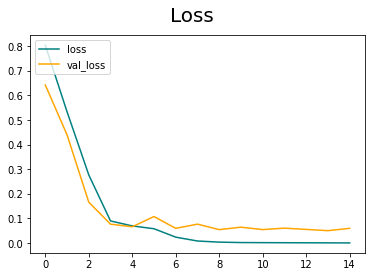

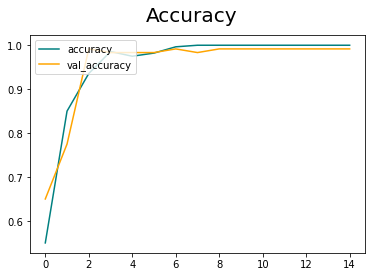

Amount categorized: 100
Correctly categorized: 84
Falsely categorized: 16
Ratio: 0.84
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

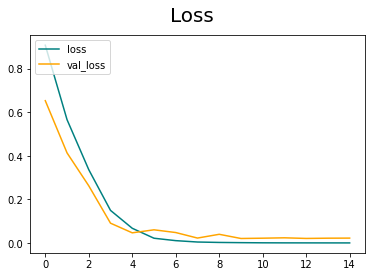

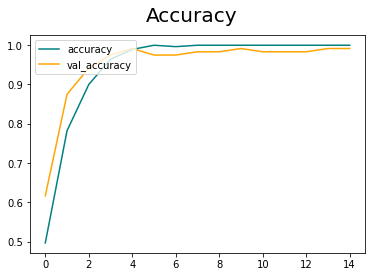

Amount categorized: 100
Correctly categorized: 62
Falsely categorized: 38
Ratio: 0.62
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                             

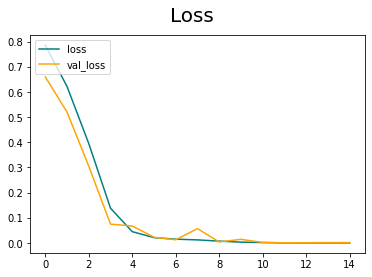

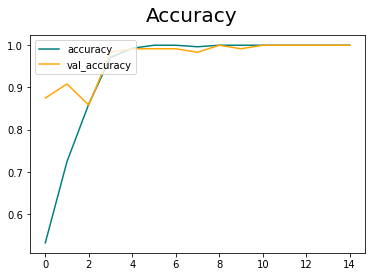

Amount categorized: 100
Correctly categorized: 70
Falsely categorized: 30
Ratio: 0.7
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

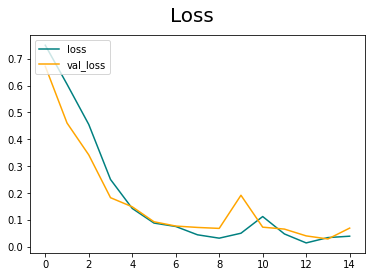

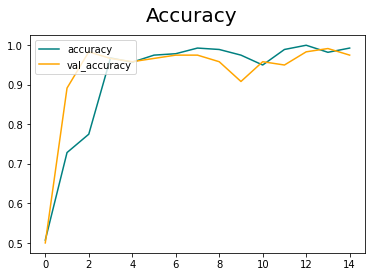

Amount categorized: 100
Correctly categorized: 95
Falsely categorized: 5
Ratio: 0.95
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_102 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_103 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

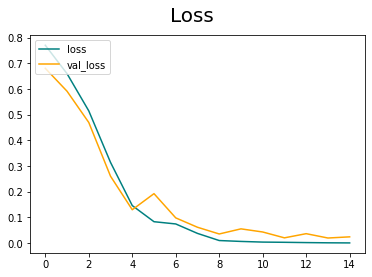

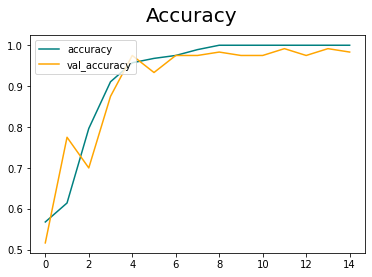

Amount categorized: 100
Correctly categorized: 75
Falsely categorized: 25
Ratio: 0.75


In [25]:
ratioImagesAllButRandomHandPositionRotationScale = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesAllButRandomHandPositionRotationScale += createNewClassifier(PATH + 'ImagesAllButRandomHandPositionRotationScale', 15, 0.5) / NUMBER_OF_ITERATIONS

In [26]:
ratioImagesAllButRandomHandPositionRotationScale

0.7719999999999999

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_105 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_106 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_106 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_107 (Conv2D)         (None, 60, 60, 16)        4624      

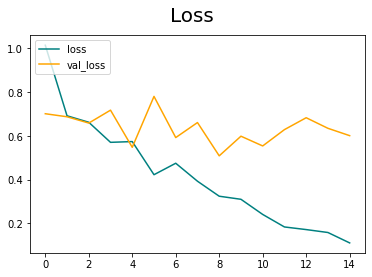

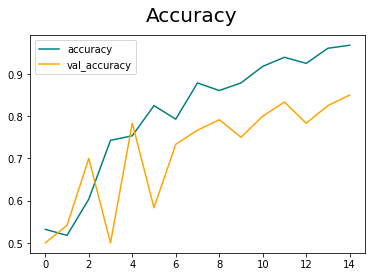

Amount categorized: 100
Correctly categorized: 74
Falsely categorized: 26
Ratio: 0.74
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_108 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_109 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

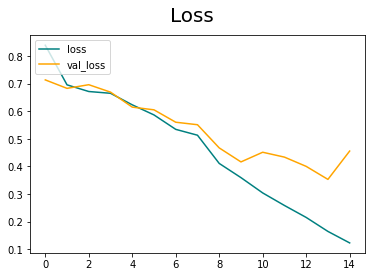

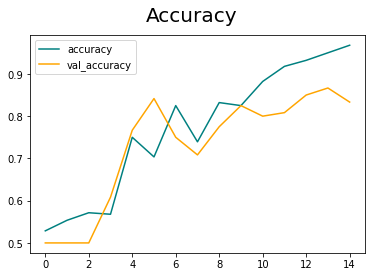

Amount categorized: 100
Correctly categorized: 60
Falsely categorized: 40
Ratio: 0.6
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_111 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_112 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_112 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

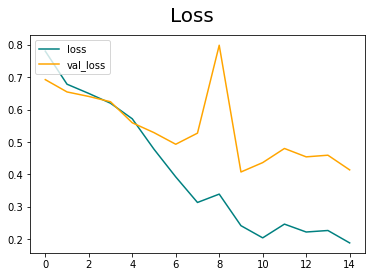

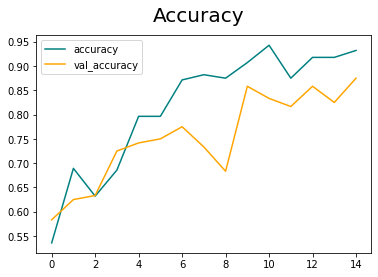

Amount categorized: 100
Correctly categorized: 77
Falsely categorized: 23
Ratio: 0.77
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_114 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_115 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_115 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

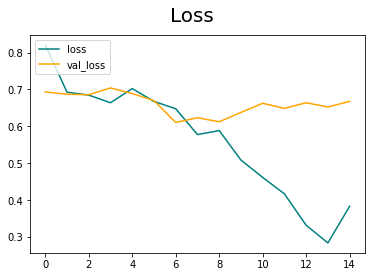

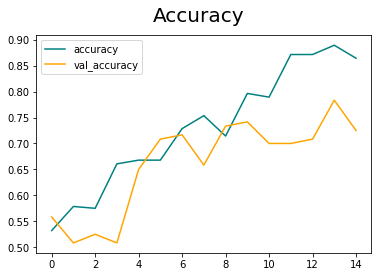

Amount categorized: 100
Correctly categorized: 61
Falsely categorized: 39
Ratio: 0.61
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_117 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_117 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_118 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_118 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

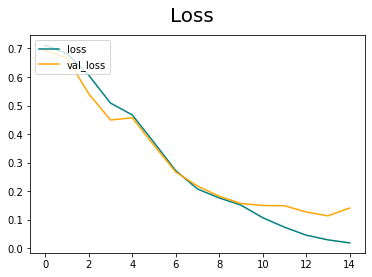

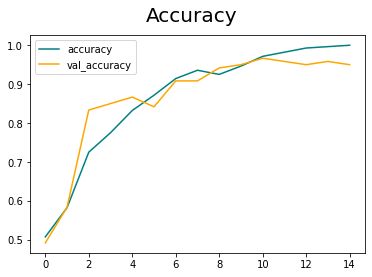

Amount categorized: 100
Correctly categorized: 87
Falsely categorized: 13
Ratio: 0.87


In [27]:
ratioImagesAllButShadowEnabled = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesAllButShadowEnabled += createNewClassifier(PATH + 'ImagesAllButShadowEnabled', 15, 0.5) / NUMBER_OF_ITERATIONS

In [28]:
ratioImagesAllButShadowEnabled

0.718

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_120 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_121 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_121 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_122 (Conv2D)         (None, 60, 60, 16)        4624      

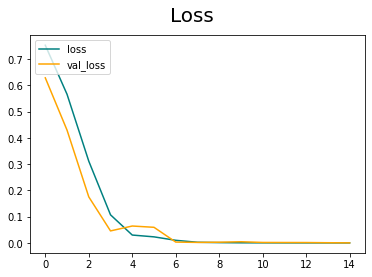

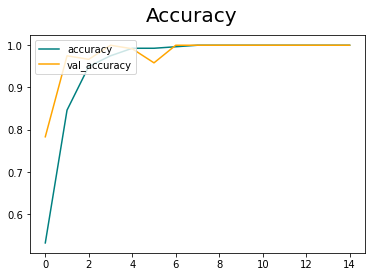

Amount categorized: 100
Correctly categorized: 58
Falsely categorized: 42
Ratio: 0.58
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_123 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_123 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_124 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_124 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

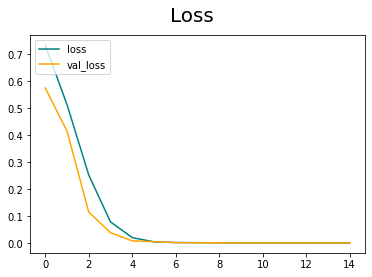

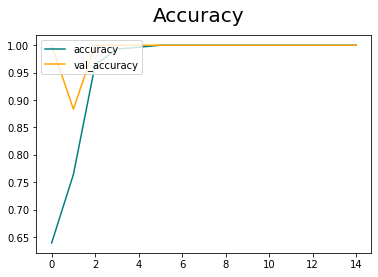

Amount categorized: 100
Correctly categorized: 58
Falsely categorized: 42
Ratio: 0.58
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_127 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

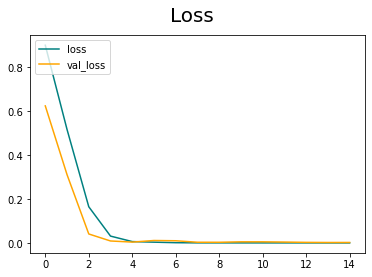

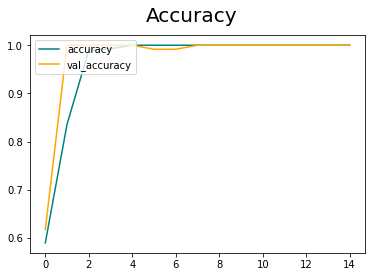

Amount categorized: 100
Correctly categorized: 58
Falsely categorized: 42
Ratio: 0.58
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_129 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_129 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_130 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

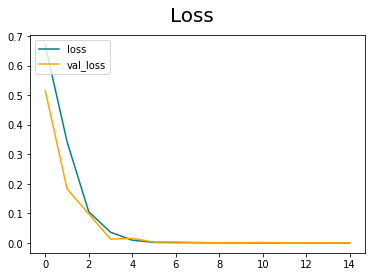

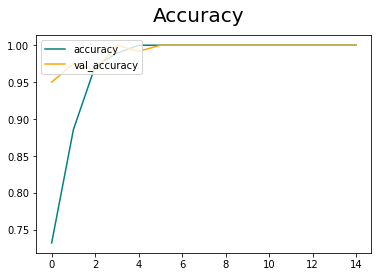

Amount categorized: 100
Correctly categorized: 57
Falsely categorized: 43
Ratio: 0.57
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_133 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

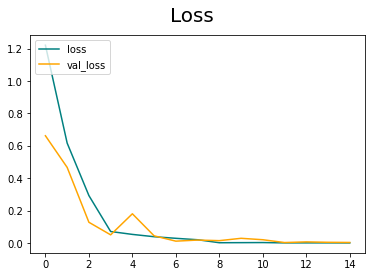

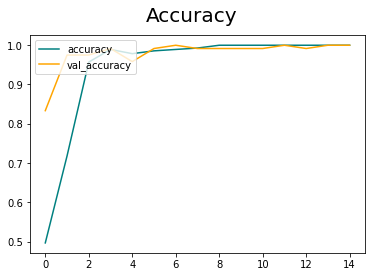

Amount categorized: 100
Correctly categorized: 54
Falsely categorized: 46
Ratio: 0.54


In [29]:
ratioImagesOnlyBackgroundChanges = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesOnlyBackgroundChanges += createNewClassifier(PATH + 'ImagesOnlyBackgroundChanges', 15, 0.5) / NUMBER_OF_ITERATIONS

In [30]:
ratioImagesOnlyBackgroundChanges

0.57

Found 280 files belonging to 2 classes.
Found 119 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_135 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_136 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_136 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_137 (Conv2D)         (None, 60, 60, 16)        4624      

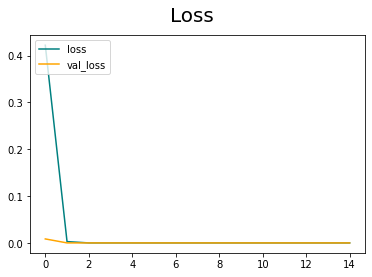

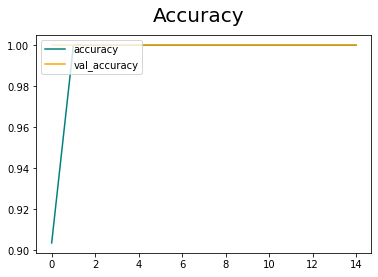

Amount categorized: 100
Correctly categorized: 53
Falsely categorized: 47
Ratio: 0.53
Found 280 files belonging to 2 classes.
Found 119 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_138 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_138 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_139 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_139 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

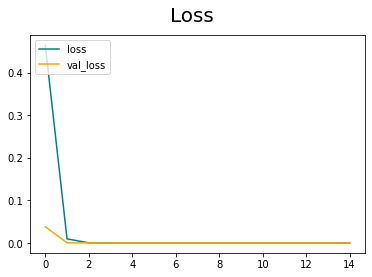

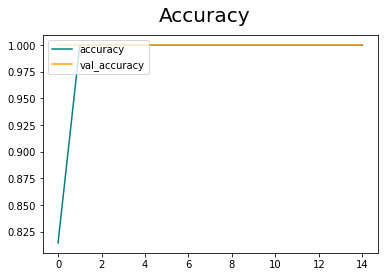

Amount categorized: 100
Correctly categorized: 50
Falsely categorized: 50
Ratio: 0.5
Found 280 files belonging to 2 classes.
Found 119 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_141 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_141 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_142 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_142 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

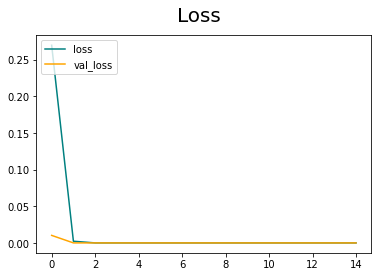

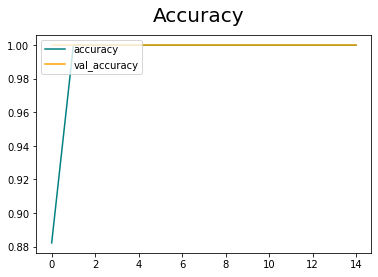

Amount categorized: 100
Correctly categorized: 50
Falsely categorized: 50
Ratio: 0.5
Found 280 files belonging to 2 classes.
Found 119 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_144 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_144 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_145 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_145 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

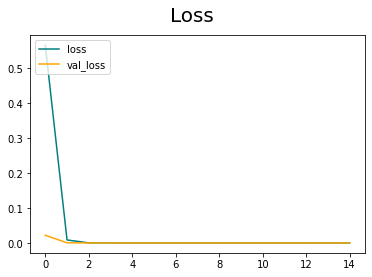

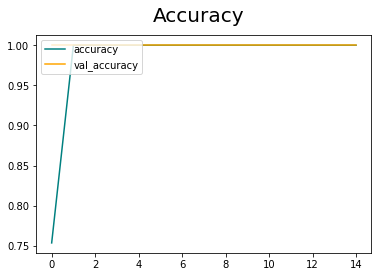

Amount categorized: 100
Correctly categorized: 50
Falsely categorized: 50
Ratio: 0.5
Found 280 files belonging to 2 classes.
Found 119 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_147 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_147 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_148 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_148 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

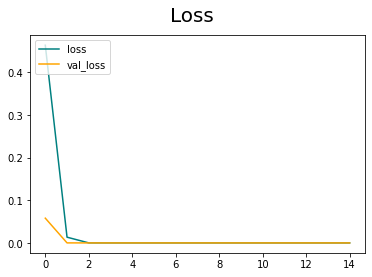

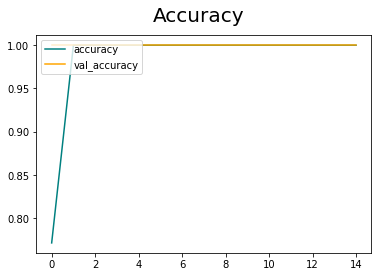

Amount categorized: 100
Correctly categorized: 52
Falsely categorized: 48
Ratio: 0.52


In [31]:
ratioImagesOnlyRandomAmbientSkyColor = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesOnlyRandomAmbientSkyColor += createNewClassifier(PATH + 'ImagesOnlyRandomAmbientSkyColor', 15, 0.5) / NUMBER_OF_ITERATIONS

In [32]:
ratioImagesOnlyRandomAmbientSkyColor

0.51

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_150 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_150 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_151 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_151 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_152 (Conv2D)         (None, 60, 60, 16)        4624      

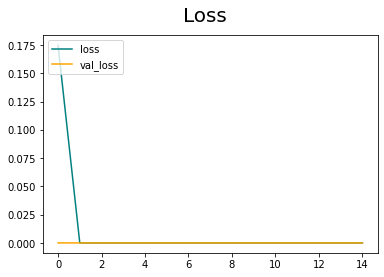

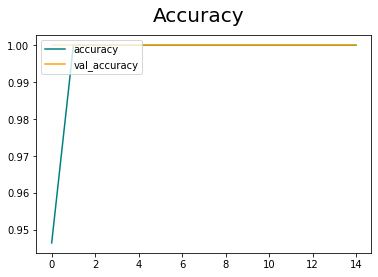

Amount categorized: 100
Correctly categorized: 51
Falsely categorized: 49
Ratio: 0.51
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_153 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_153 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_154 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_154 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

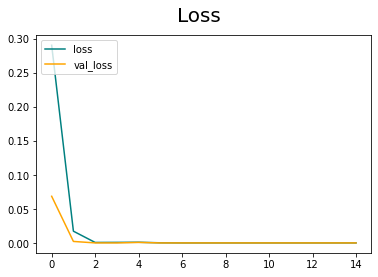

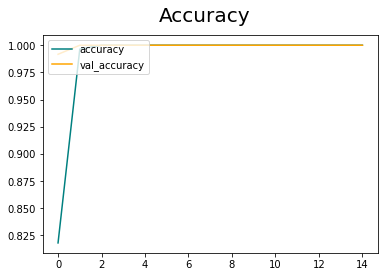

Amount categorized: 100
Correctly categorized: 51
Falsely categorized: 49
Ratio: 0.51
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_156 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_156 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_157 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_157 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

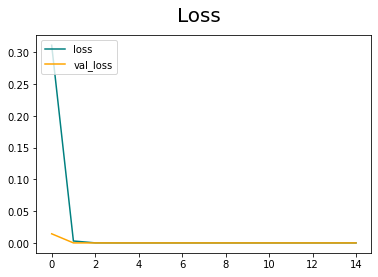

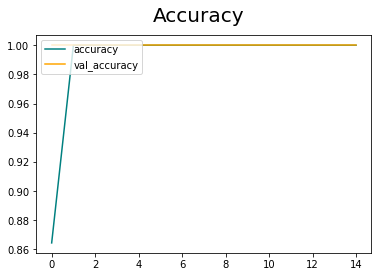

Amount categorized: 100
Correctly categorized: 50
Falsely categorized: 50
Ratio: 0.5
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_159 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_159 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_160 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_160 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

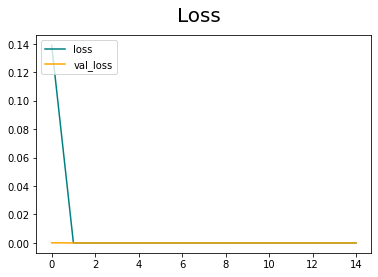

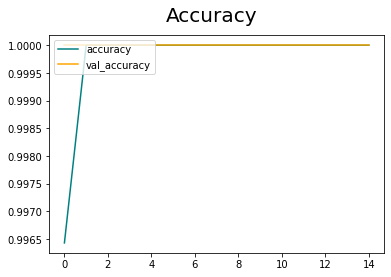

Amount categorized: 100
Correctly categorized: 62
Falsely categorized: 38
Ratio: 0.62
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_162 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_162 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_163 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_163 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

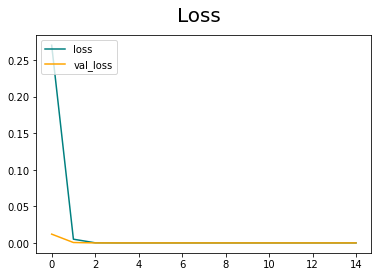

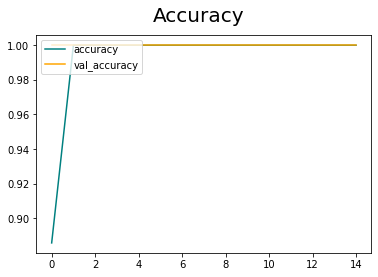

Amount categorized: 100
Correctly categorized: 50
Falsely categorized: 50
Ratio: 0.5


In [33]:
ratioImagesOnlyRandomDirectionalLight = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesOnlyRandomDirectionalLight += createNewClassifier(PATH + 'ImagesOnlyRandomDirectionalLight', 15, 0.5) / NUMBER_OF_ITERATIONS

In [34]:
ratioImagesOnlyRandomDirectionalLight

0.528

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_165 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_165 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_166 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_166 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_167 (Conv2D)         (None, 60, 60, 16)        4624      

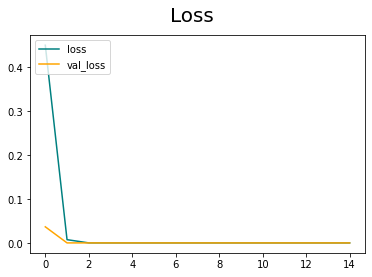

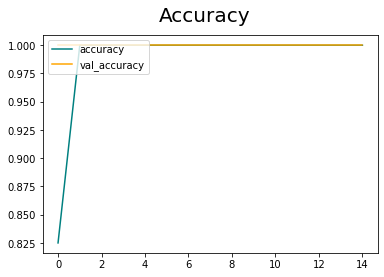

Amount categorized: 100
Correctly categorized: 57
Falsely categorized: 43
Ratio: 0.57
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_168 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_168 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_169 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_169 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

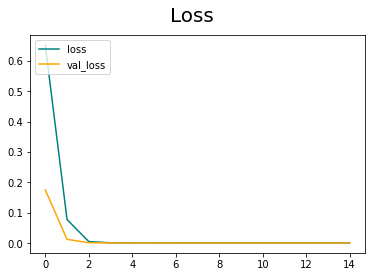

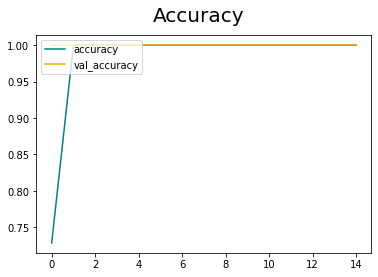

Amount categorized: 100
Correctly categorized: 52
Falsely categorized: 48
Ratio: 0.52
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_171 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_171 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_172 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_172 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

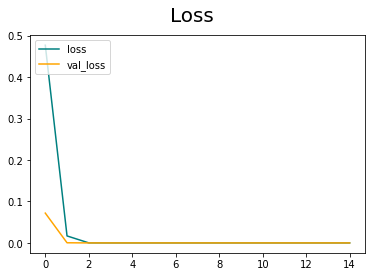

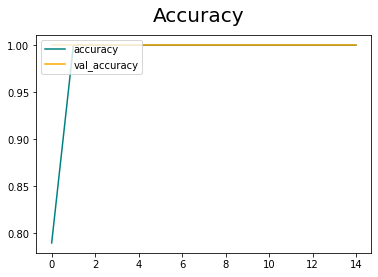

Amount categorized: 100
Correctly categorized: 52
Falsely categorized: 48
Ratio: 0.52
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_174 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_174 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_175 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_175 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

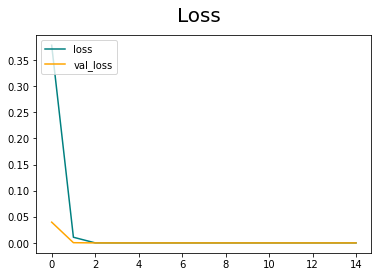

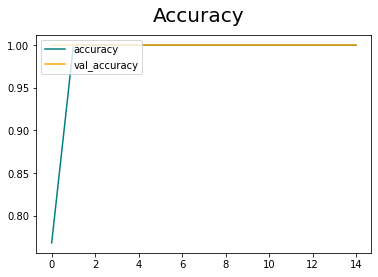

Amount categorized: 100
Correctly categorized: 56
Falsely categorized: 44
Ratio: 0.56
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_177 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_177 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_178 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_178 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

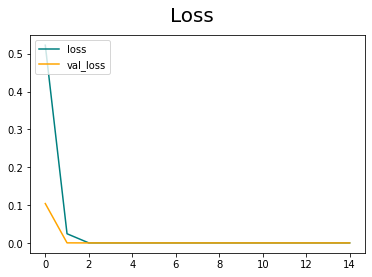

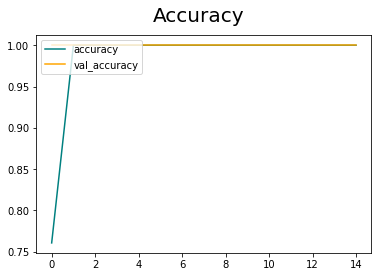

Amount categorized: 100
Correctly categorized: 52
Falsely categorized: 48
Ratio: 0.52


In [35]:
ratioImagesOnlyRandomHandPositionRotationScale = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesOnlyRandomHandPositionRotationScale += createNewClassifier(PATH + 'ImagesOnlyRandomHandPositionRotationScale', 15, 0.5) / NUMBER_OF_ITERATIONS

In [36]:
ratioImagesOnlyRandomHandPositionRotationScale

0.538

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_180 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_180 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_181 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_181 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_182 (Conv2D)         (None, 60, 60, 16)        4624      

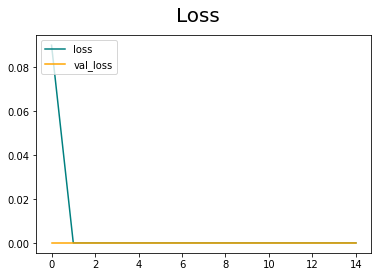

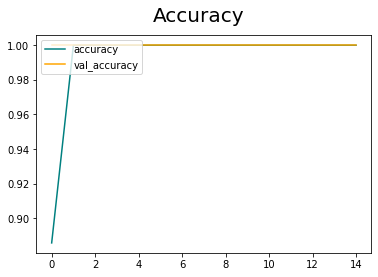

Amount categorized: 100
Correctly categorized: 61
Falsely categorized: 39
Ratio: 0.61
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_183 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_183 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_184 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_184 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

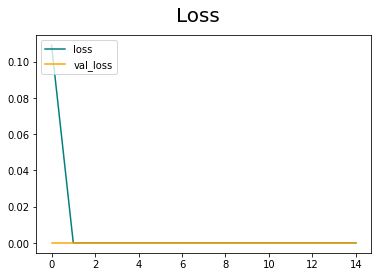

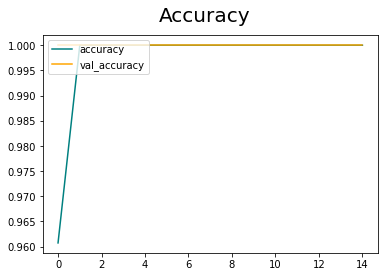

Amount categorized: 100
Correctly categorized: 56
Falsely categorized: 44
Ratio: 0.56
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_186 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_186 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_187 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_187 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

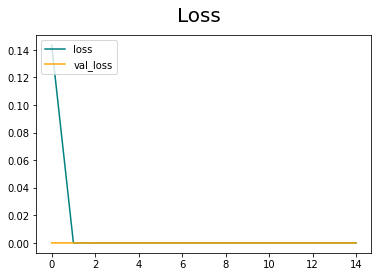

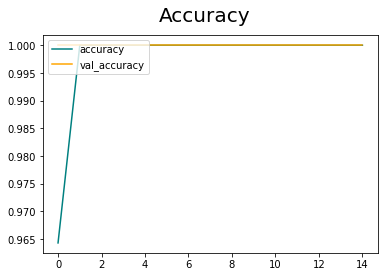

Amount categorized: 100
Correctly categorized: 55
Falsely categorized: 45
Ratio: 0.55
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_189 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_189 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_190 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_190 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

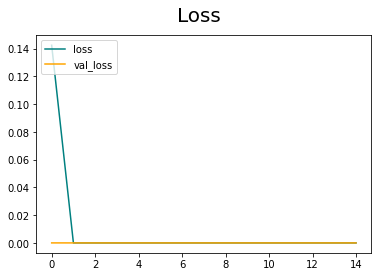

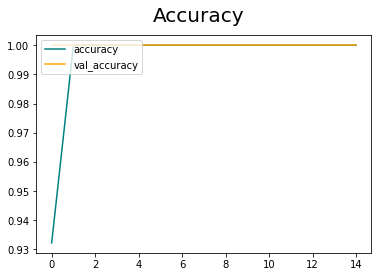

Amount categorized: 100
Correctly categorized: 52
Falsely categorized: 48
Ratio: 0.52
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_192 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_193 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_193 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

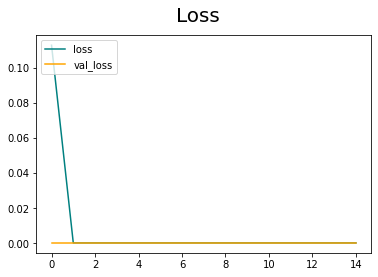

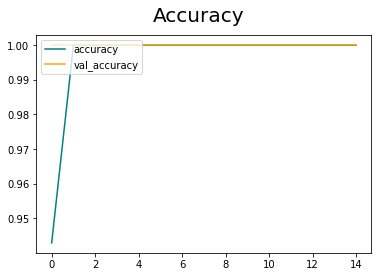

Amount categorized: 100
Correctly categorized: 66
Falsely categorized: 34
Ratio: 0.66


In [37]:
ratioImagesOnlyShadowEnabled = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesOnlyShadowEnabled += createNewClassifier(PATH + 'ImagesOnlyShadowEnabled', 15, 0.5) / NUMBER_OF_ITERATIONS

In [38]:
ratioImagesOnlyShadowEnabled

0.5800000000000001

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_195 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_195 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_196 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_196 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_197 (Conv2D)         (None, 60, 60, 16)        4624      

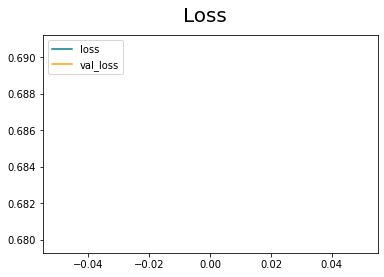

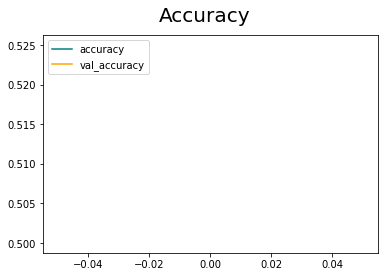

Amount categorized: 100
Correctly categorized: 50
Falsely categorized: 50
Ratio: 0.5
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_198 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_198 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_199 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_199 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

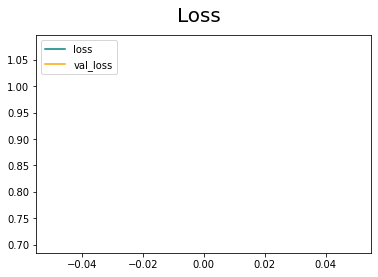

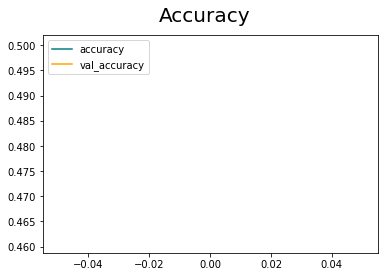

Amount categorized: 100
Correctly categorized: 51
Falsely categorized: 49
Ratio: 0.51
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_201 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_201 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_202 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_202 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

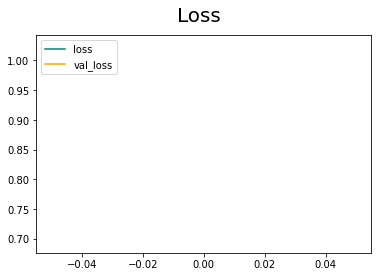

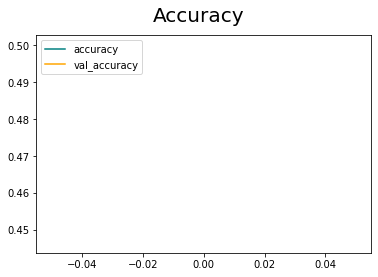

Amount categorized: 100
Correctly categorized: 50
Falsely categorized: 50
Ratio: 0.5
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_204 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_204 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_205 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_205 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

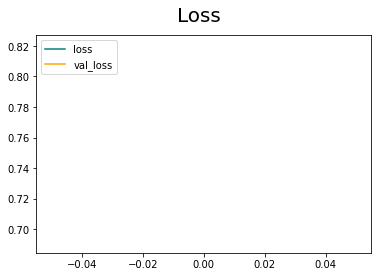

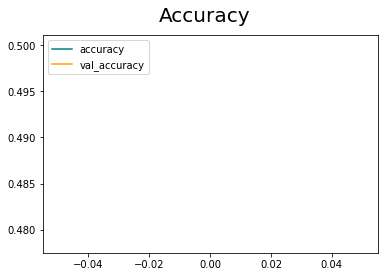

Amount categorized: 100
Correctly categorized: 50
Falsely categorized: 50
Ratio: 0.5
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_207 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_207 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_208 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_208 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

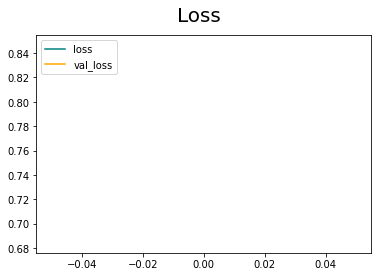

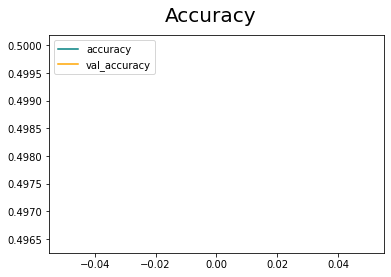

Amount categorized: 100
Correctly categorized: 50
Falsely categorized: 50
Ratio: 0.5


In [39]:
ratioImagesAllEnabledBatches1 = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesAllEnabledBatches1 += createNewClassifier(PATH + 'ImagesAllEnabled', 1, 0.5) / NUMBER_OF_ITERATIONS

In [40]:
ratioImagesAllEnabledBatches1

0.502

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_210 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_210 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_211 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_211 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_212 (Conv2D)         (None, 60, 60, 16)        4624      

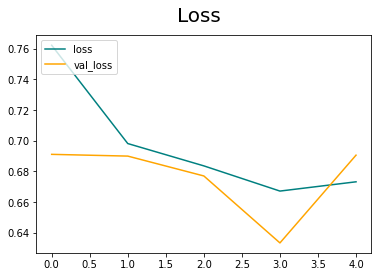

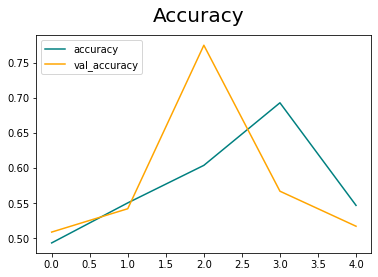

Amount categorized: 100
Correctly categorized: 62
Falsely categorized: 38
Ratio: 0.62
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_213 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_213 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_214 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_214 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

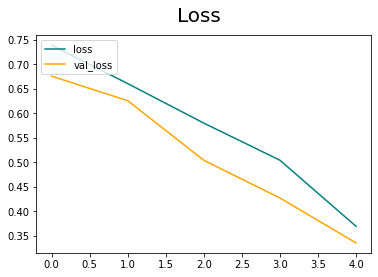

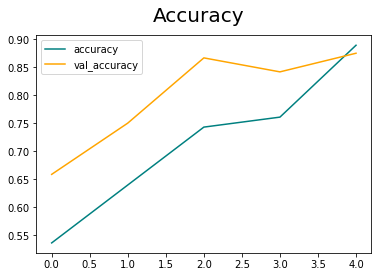

Amount categorized: 100
Correctly categorized: 74
Falsely categorized: 26
Ratio: 0.74
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_216 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_216 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_217 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_217 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

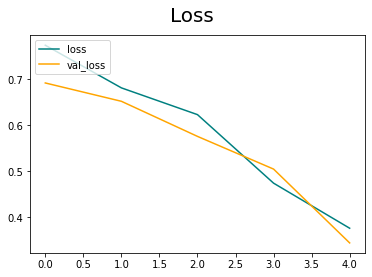

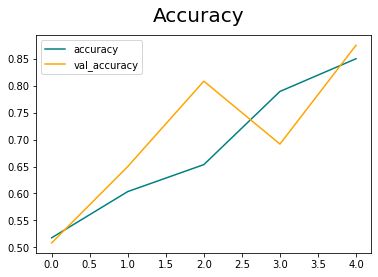

Amount categorized: 100
Correctly categorized: 84
Falsely categorized: 16
Ratio: 0.84
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_219 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_219 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_220 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_220 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                             

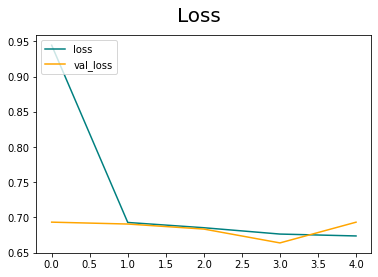

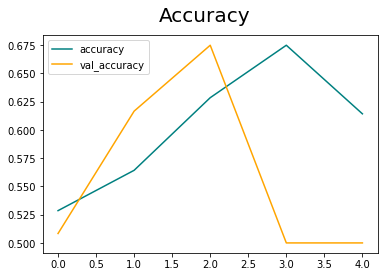

Amount categorized: 100
Correctly categorized: 50
Falsely categorized: 50
Ratio: 0.5
Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_222 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_222 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_223 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_223 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                              

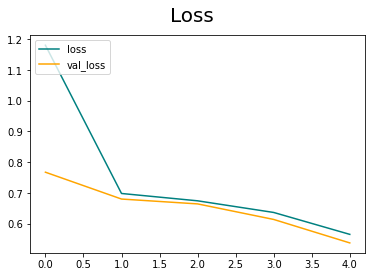

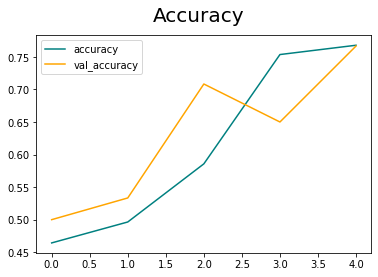

Amount categorized: 100
Correctly categorized: 70
Falsely categorized: 30
Ratio: 0.7


In [41]:
ratioImagesAllEnabledBatches5 = 0

for _ in range(NUMBER_OF_ITERATIONS):
    ratioImagesAllEnabledBatches5 += createNewClassifier(PATH + 'ImagesAllEnabled', 5, 0.5) / NUMBER_OF_ITERATIONS

In [42]:
ratioImagesAllEnabledBatches5

0.68

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_225 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_225 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_226 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_226 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_227 (Conv2D)         (None, 60, 60, 16)        4624      

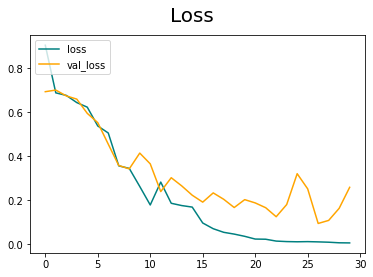

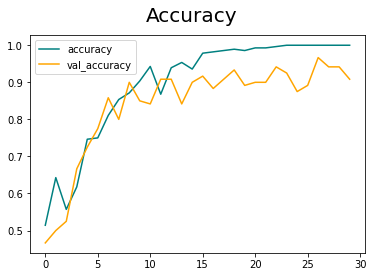

Amount categorized: 100
Correctly categorized: 90
Falsely categorized: 10
Ratio: 0.9


In [43]:
ratioImagesAllEnabledBatches30 = createNewClassifier(PATH + 'ImagesAllEnabled', 30, 0.5)

In [44]:
ratioImagesAllEnabledBatches30

0.9

Found 280 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_228 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_228 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_229 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_229 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_230 (Conv2D)         (None, 60, 60, 16)        4624      

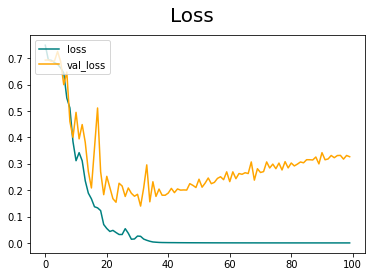

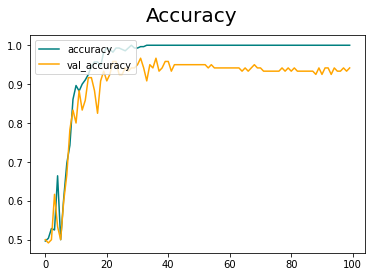

Amount categorized: 100
Correctly categorized: 79
Falsely categorized: 21
Ratio: 0.79


In [45]:
ratioImagesAllEnabledBatches100 = createNewClassifier(PATH + 'ImagesAllEnabled', 100, 0.5)

In [46]:
ratioImagesAllEnabledBatches100

0.79

# Results

In [58]:
print("Normal Detection rate was " + str(ratioImagesAllEnabled))
print("Detection rate for big size was " + str(ratioImagesAllEnabledBigSize))
print("Detection rate for threshold of 0.1 was " + str(ratioImagesThreshold01))
print("Detection rate for threshold of 0.3 was " + str(ratioImagesThreshold03))
print("Detection rate for threshold of 0.5 was " + str(ratioImagesThreshold05))
print("Detection rate for threshold of 0.7 was " + str(ratioImagesThreshold07))
print("Detection rate for threshold of 0.9 was " + str(ratioImagesThreshold09))
print("Detection rate when everything but background changes was " + str(ratioImagesAllButBackgroundChanges))
print("Detection rate when everything but ambient sky color changes was " + str(ratioImagesAllButRandomAmbientSkyColor))
print("Detection rate when everything but directional light changes was " + str(ratioImagesAllButRandomDirectionalLight))
print("Detection rate when everything but random hand position changes was " + str(ratioImagesAllButRandomHandPositionRotationScale))
print("Detection rate when everything but shadow changes was " + str(ratioImagesAllButShadowEnabled))
print("Detection rate when only background changes was " + str(ratioImagesOnlyBackgroundChanges))
print("Detection rate when only ambient sky color changes was " + str(ratioImagesOnlyRandomAmbientSkyColor))
print("Detection rate when only directional light changes was " + str(ratioImagesOnlyRandomDirectionalLight))
print("Detection rate when only random hand position changes was " + str(ratioImagesOnlyRandomHandPositionRotationScale))
print("Detection rate when only shadow changes was " + str(ratioImagesOnlyShadowEnabled))
print("Normal Detection rate with 1 epochs was " + str(ratioImagesAllEnabledBatches1))
print("Normal Detection rate with 5 epochs was " + str(ratioImagesAllEnabledBatches5))
print("Normal Detection rate with 30 epochs was " + str(ratioImagesAllEnabledBatches30))
print("Normal Detection rate with 100 epochs was " + str(ratioImagesAllEnabledBatches100))

Normal Detection rate was 0.8500000000000001
Detection rate for big size was 0.9179999999999999
Detection rate for ratio of 0.1 was 0.84
Detection rate for ratio of 0.3 was 0.86
Detection rate for ratio of 0.5 was 0.92
Detection rate for ratio of 0.7 was 0.86
Detection rate for ratio of 0.9 was 0.65
Detection rate when everything but background changes was 0.376
Detection rate when everything but ambient sky color changes was 0.7
Detection rate when everything but directional light changes was 0.76
Detection rate when everything but random hand position changes was 0.7719999999999999
Detection rate when everything but shadow changes was 0.718
Detection rate when only background changes was 0.57
Detection rate when only ambient sky color changes was 0.51
Detection rate when only directional light changes was 0.528
Detection rate when only random hand position changes was 0.538
Detection rate when only shadow changes was 0.5800000000000001
Normal Detection rate with 1 batch was 0.502
Nor

# Results

Normal Detection rate was 0.8500000000000001

Detection rate for big size was 0.9179999999999999

Detection rate for ratio of 0.1 was 0.84

Detection rate for ratio of 0.3 was 0.86

Detection rate for ratio of 0.5 was 0.92

Detection rate for ratio of 0.7 was 0.86

Detection rate for ratio of 0.9 was 0.65

Detection rate when everything but background changes was 0.376

Detection rate when everything but ambient sky color changes was 0.7

Detection rate when everything but directional light changes was 0.76

Detection rate when everything but random hand position changes was 0.7719999999999999

Detection rate when everything but shadow changes was 0.718

Detection rate when only background changes was 0.57

Detection rate when only ambient sky color changes was 0.51

Detection rate when only directional light changes was 0.528

Detection rate when only random hand position changes was 0.538

Detection rate when only shadow changes was 0.5800000000000001

Normal Detection rate with 1 batch was 0.502

Normal Detection rate with 5 batch was 0.68

Normal Detection rate with 30 batch was 0.9

Normal Detection rate with 100 batch was 0.79